# Проект по Вычислительной Алгебре

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

#№ Тестовый датасет fetch_olivetti_faces

### Примеры изображений из датасета

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


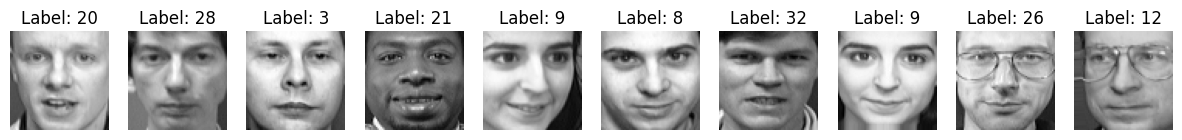

In [2]:
from sklearn.datasets import fetch_olivetti_faces

# Загрузка датасета
data = fetch_olivetti_faces(shuffle=True, random_state=42)

# Получение изображений и меток
images = data.images  # массив изображений размером (400, 64, 64)
targets = data.target  # метки классов (индекс человека)

# Визуализация нескольких изображений из датасета
fig, axes = plt.subplots(1, 10, figsize=(15, 5))
for i, ax in enumerate(axes):
    ax.imshow(images[i], cmap='gray')
    ax.set_title(f"Label: {targets[i]}")
    ax.axis('off')

plt.show()

### Примеры базисных компонент. Обычный и разряженный SVD дают разные результаты!

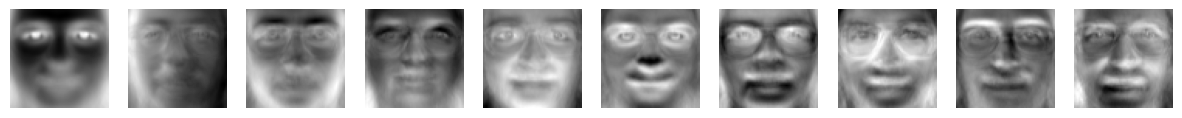

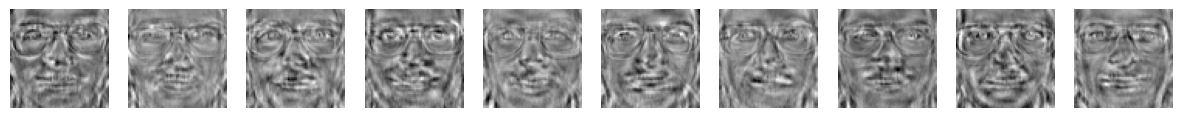

(100, 64, 64)
(100, 64, 64)
14.142131 fro


In [3]:
from scipy.linalg import svd
from scipy.sparse.linalg import svds

k = 100 # сколько компонент

U, L, V = svd(images.reshape(400, -1), full_matrices=False)
U_s, L_s, V_s = svds(images.reshape(400, -1), k=k)
components = V[:k].reshape(-1, 64, 64)
components_s = V_s.reshape(-1, 64, 64)

fig, axes = plt.subplots(1, 10, figsize=(15, 5))
for i, ax in enumerate(axes):
    ax.imshow(components[i], cmap='gray')
    ax.axis('off')
plt.show()

fig, axes = plt.subplots(1, 10, figsize=(15, 5))
for i, ax in enumerate(axes):
    ax.imshow(components_s[i], cmap='gray')
    ax.axis('off')
plt.show()

print(components_s.shape)
print(components.shape)
print(sp.linalg.norm(components_s - components), 'fro')

### Проверка методики определения принадлежности фото человеку через KNN на простом датасете

In [4]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1. Загрузка датасета
data = fetch_olivetti_faces(shuffle=True, random_state=42)
X = data.data  # Плоские массивы изображений (400, 4096)
y = data.target  # Метки классов (400,)

# 2. Разделение выборки на train и test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=targets, random_state=42,
)

# 3. Применение SVD для уменьшения размерности
n_components = 100  # Число компонент для SVD
svd = TruncatedSVD(n_components=n_components, algorithm='arpack', random_state=42)
X_train_svd = svd.fit_transform(X_train)  # Обучающая выборка после SVD
X_test_svd = svd.transform(X_test)        # Тестовая выборка после SVD

# 4. Построение классификатора KNN
n_neighbors = 3  # Количество ближайших соседей
knn = KNeighborsClassifier(
    n_neighbors=n_neighbors,
    weights='distance',
    algorithm='auto',
    p=2,
    metric='minkowski',
    n_jobs=-1,
)
knn.fit(X_train_svd, y_train)

# 5. Предсказание классов на тестовой выборке
y_pred = knn.predict(X_test_svd)

# 6. Оценка качества алгоритма
print("Accuracy:", accuracy_score(y_test, y_pred))  # Общая точность
print("\nClassification Report:\n", classification_report(y_test, y_pred))  # Отчёт по метрикам

Accuracy: 0.925

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2
           8       1.00      0.50      0.67         2
           9       1.00      0.50      0.67         2
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         2
          15       0.50      0.50      0.50         2
          16       1.00      1.00      1

## Основной датасет face-recognition-dataset

In [5]:
!pip3 install kagglehub --upgrade

In [6]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("stoicstatic/face-recognition-dataset")

print("Path to dataset files:", path)

100%|██████████| 181M/181M [00:04<00:00, 39.4MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/stoicstatic/face-recognition-dataset/versions/10


In [7]:
# Путь к директории с датасетом

path = r"/root/.cache/kagglehub/datasets/stoicstatic/face-recognition-dataset/versions/10/Extracted Faces/Extracted Faces/"

### Примеры изображений из датасета

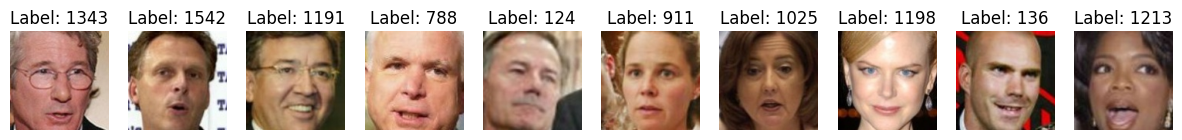

In [8]:
import cv2
import os

class_paths = os.listdir(path)

# Визуализация нескольких изображений из датасета
fig, axes = plt.subplots(1, 10, figsize=(15, 5))
for i, ax in enumerate(axes):
    class_path = os.path.join(path, class_paths[i])
    image_names = os.listdir(class_path)
    image_name = os.path.join(class_path, image_names[0])
    img = cv2.imread(image_name)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    ax.imshow(img, cmap='gray')
    ax.set_title(f"Label: {class_paths[i]}")
    ax.axis('off')

plt.show()

### Выгрузка датасета

In [9]:
from PIL import Image
import os

# Функция для загрузки изображений и меток классов
def load_dataset(path):
    images = []
    targets = []

    # Обход папок с изображениями
    for class_name in os.listdir(path):
        class_path = os.path.join(path, class_name)
        if not os.path.isdir(class_path):
            continue

        try:
            label = int(class_name)  # Имя папки преобразуем в метку класса
        except ValueError:
            print(f"Пропускаем папку {class_name}, так как она не является номером класса.")
            continue

        for image_name in os.listdir(class_path):
            image_path = os.path.join(class_path, image_name)
            try:
                # Загружаем изображение и преобразуем его в RGB
                img = Image.open(image_path).convert("RGB")
                img_array = np.array(img, dtype=np.float64)

                # Переставляем оси в формат (C, H, W)
                img_array = np.transpose(img_array, (2, 0, 1))

                images.append(img_array)
                targets.append(label)
            except Exception as e:
                print(f"Ошибка при обработке изображения {image_path}: {e}")

    # Преобразуем списки в массивы numpy
    images = np.array(images, dtype=np.float64)
    targets = np.array(targets, dtype=np.int64)

    return images, targets

# Загрузка датасета
images, targets = load_dataset(path)

# Вывод размеров массивов
print("Размер массива images:", images.shape)
print("Размер массива targets:", targets.shape)
print("Колличество классов в датасете:", np.unique(targets).size)

Размер массива images: (6107, 3, 128, 128)
Размер массива targets: (6107,)
Колличество классов в датасете: 1324


### Фильтрация, подготовка train и test частей

In [10]:
from sklearn.model_selection import train_test_split

# Фильтрация классов с количеством изображений > 20
unique_classes, class_counts = np.unique(targets, return_counts=True)
filtered_classes = unique_classes[class_counts > 20]

filtered_indices = np.isin(targets, filtered_classes)
images_filtered = images[filtered_indices]
targets_filtered = targets[filtered_indices]

# Проверяем, что каждый класс имеет достаточно данных для разбиения
unique_classes, class_counts = np.unique(targets_filtered, return_counts=True)
min_test_size = 1  # Минимальный размер тестовой выборки для каждого класса
if np.any(class_counts < 2 * min_test_size):
    raise ValueError("Некоторые классы имеют недостаточно данных для разбиения на train и test.")

print("Размер массива images после фильтрации:", images_filtered.shape)
print("Размер массива targets после фильтрации:", targets_filtered.shape)
print("Колличество классов в датасете после фильтрации:", np.unique(targets_filtered).size)

# Разбиение на train и test с учетом сохранения классов
train_indices, test_indices = train_test_split(
    np.arange(len(targets_filtered)), test_size=0.2, stratify=targets_filtered, random_state=42
)

images_train, images_test = images_filtered[train_indices], images_filtered[test_indices]
targets_train, targets_test = targets_filtered[train_indices], targets_filtered[test_indices]

# Преобразуем изображения для SVD (объединяем каналы и приводим к двумерному виду)
def flatten_images(images):
    N, C, H, W = images.shape
    return images.reshape(N, C * H * W)

images_train_flat = flatten_images(images_train)
images_test_flat = flatten_images(images_test)

# Вывод размеров массивов
print("Размер массива images_train_flat:", images_train_flat.shape)
print("Размер массива images_test_flat:", images_test_flat.shape)
print("Размер массива targets_train:", targets_train.shape)
print("Размер массива targets_test:", targets_test.shape)

Размер массива images после фильтрации: (1069, 3, 128, 128)
Размер массива targets после фильтрации: (1069,)
Колличество классов в датасете после фильтрации: 33
Размер массива images_train_flat: (855, 49152)
Размер массива images_test_flat: (214, 49152)
Размер массива targets_train: (855,)
Размер массива targets_test: (214,)


### Сравнение нескольких алгоритмов SVD с одинаковыми начальными гиперпараметрами

In [11]:
from scipy.linalg import svd
from scipy.sparse.linalg import svds
from sklearn.utils.extmath import randomized_svd
from sklearn.decomposition import TruncatedSVD
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from time import time

n_neighbors = 20 # Число соседей в KNN
n_components = 500  # Число компонент для уменьшения размерности

# Список алгоритмов
algorithms = [
    ("Classic SVD (scipy.linalg.svd)", lambda X: svd(X, full_matrices=False, compute_uv=True)),
    ("Sparse SVD (scipy.sparse.linalg.svds)", lambda X: svds(X, k=n_components, return_singular_vectors=True)),
    ("Randomized SVD (sklearn.utils.extmath.randomized_svd)",
     lambda X: randomized_svd(X, n_components=n_components, random_state=42)),
    ("Truncated SVD (randomized, sklearn.decomposition.TruncatedSVD)",
     TruncatedSVD(n_components=n_components, algorithm="randomized", random_state=42)),
    ("Truncated SVD (arpack, sklearn.decomposition.TruncatedSVD)",
     TruncatedSVD(n_components=n_components, algorithm="arpack", random_state=42)),
]

# Замеры точности и времени
def compare_algorithms(algorithms, images_train_flat, images_test_flat, targets_train, targets_test, n_neighbors_list, n_components_list):
    results = []

    for i, (name, algorithm) in enumerate(algorithms):
        n_neighbors = n_neighbors_list[i]
        n_components = n_components_list[i]

        knn = KNeighborsClassifier(
            n_neighbors=n_neighbors,
            weights='distance',
            algorithm='auto',
            p=2,
            metric='minkowski',
            n_jobs=-1,
        )

        start_time = time()

        if "Truncated SVD" in name:
            # Метод TruncatedSVD из sklearn
            images_train_svd = algorithm.fit_transform(images_train_flat)
            images_test_svd = algorithm.transform(images_test_flat)
        elif "Classic SVD" in name:
            # Метод svd из scipy
            U_train, Sigma_train, VT_train = algorithm(images_train_flat)
            U_train, Sigma_train, VT_train = U_train[:, :n_components], Sigma_train[:n_components], VT_train[:n_components]
            images_train_svd = U_train * Sigma_train[np.newaxis, :]
            # Преобразование тестовых данных через VT_train
            images_test_svd = images_test_flat @ VT_train.T
        else:
            # Методы svds и randomized_svd из scipy
            U_train, Sigma_train, VT_train = algorithm(images_train_flat)
            images_train_svd = U_train * Sigma_train[np.newaxis, :]
            # Преобразование тестовых данных через VT_train
            images_test_svd = images_test_flat @ VT_train.T

        elapsed_time = time() - start_time

        # Обучение KNN
        knn.fit(images_train_svd, targets_train)
        predictions = knn.predict(images_test_svd)
        # Вычисление точности
        accuracy = accuracy_score(targets_test, predictions)

        # Сохраняем пару (точность, время)
        results.append((name, accuracy, elapsed_time))
        print(f"Алгоритм: {name}, Точность: {accuracy:.4f}, Время: {elapsed_time:.2f} сек,")

    return results

results = compare_algorithms(
    algorithms,
    images_train_flat,
    images_test_flat,
    targets_train,
    targets_test,
    [n_neighbors] * len(algorithms),
    [n_components] * len(algorithms),
)

Алгоритм: Classic SVD (scipy.linalg.svd), Точность: 0.2477, Время: 41.44 сек,
Алгоритм: Sparse SVD (scipy.sparse.linalg.svds), Точность: 0.2477, Время: 112.47 сек,
Алгоритм: Randomized SVD (sklearn.utils.extmath.randomized_svd), Точность: 0.2430, Время: 35.39 сек,
Алгоритм: Truncated SVD (randomized, sklearn.decomposition.TruncatedSVD), Точность: 0.2430, Время: 43.81 сек,
Алгоритм: Truncated SVD (arpack, sklearn.decomposition.TruncatedSVD), Точность: 0.2477, Время: 96.64 сек,


### Визуализация результатов

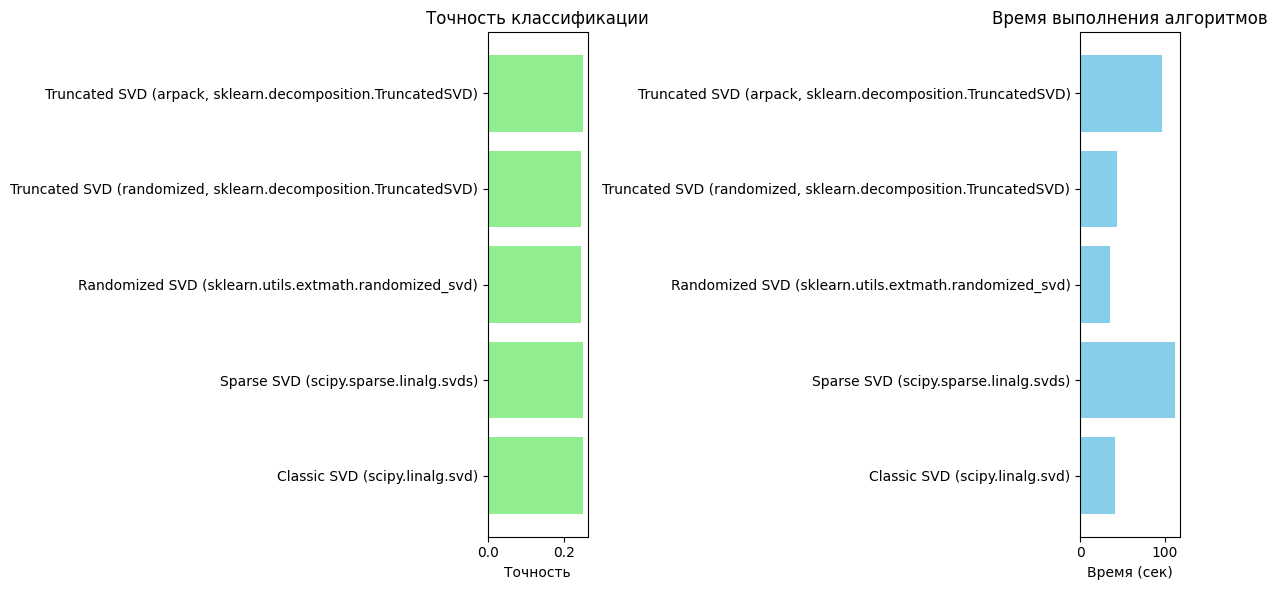

In [12]:
# Построение графиков
def plot_results(results):
    names, accuracies, elapsed_times = zip(*results)

    plt.figure(figsize=(12, 6))

    # График точности
    plt.subplot(1, 2, 1)
    plt.barh(names, accuracies, color="lightgreen")
    plt.xlabel("Точность")
    plt.title("Точность классификации")

    # График времени
    plt.subplot(1, 2, 2)
    plt.barh(names, elapsed_times, color="skyblue")
    plt.xlabel("Время (сек)")
    plt.title("Время выполнения алгоритмов")

    plt.tight_layout()
    plt.show()

plot_results(results)

## Оптимизация гипераметров при помощи Optuna

In [13]:
!pip3 install optuna --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.0 MB/s eta 0:00:00


In [14]:
import optuna
from sklearn.decomposition import randomized_svd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from time import time

# Многокритериальная целевая функция для оптимизации SVD с использованием Optuna
# Цель - максимизация точности и минимизация времени
def function(trial: optuna.trial.Trial, algorithm, images_train_flat, images_test_flat, targets_train, targets_test):
    # Гиперпараметры, которые мы хотим оптимизировать
    n_neighbors = trial.suggest_int('n_neighbors', 3, 30, log=True)  # Число соседей для KNN
    n_components = trial.suggest_int('n_components', 10, 1000, log=True)  # Количество компонент для SVD

    knn = KNeighborsClassifier(
        n_neighbors=n_neighbors,
        weights='distance',
        algorithm='auto',
        p=2,
        metric='minkowski',
        n_jobs=1,
    )

    start_time = time()

    if "Truncated SVD" in algorithm[0]:
        # Метод TruncatedSVD из sklearn
        images_train_svd = algorithm[1].fit_transform(images_train_flat)
        images_test_svd = algorithm[1].transform(images_test_flat)
    elif "Classic SVD" in algorithm[0]:
        # Метод svd из scipy
        U_train, Sigma_train, VT_train = algorithm[1](images_train_flat)
        U_train, Sigma_train, VT_train = U_train[:, :n_components], Sigma_train[:n_components], VT_train[:n_components]
        images_train_svd = U_train * Sigma_train[np.newaxis, :]
        # Преобразование тестовых данных через VT_train
        images_test_svd = images_test_flat @ VT_train.T
    else:
        # Методы svds и randomized_svd из scipy
        U_train, Sigma_train, VT_train = algorithm[1](images_train_flat)
        images_train_svd = U_train * Sigma_train[np.newaxis, :]
        # Преобразование тестовых данных через VT_train
        images_test_svd = images_test_flat @ VT_train.T

    elapsed_time = time() - start_time

    # Обучение KNN
    knn.fit(images_train_svd, targets_train)
    predictions = knn.predict(images_test_svd)
    # Вычисление точности
    accuracy = accuracy_score(targets_test, predictions)

    # Возвращаем пару (точность, время)
    return accuracy, elapsed_time

In [15]:
from functools import partial

n_trials=20

studies = []

for i, algorithm in enumerate(algorithms):

    objective = partial(
        function,
        algorithm=algorithm,
        images_train_flat=images_train_flat,
        images_test_flat=images_test_flat,
        targets_train=targets_train,
        targets_test=targets_test,
    )

    sampler = optuna.samplers.TPESampler(
        n_startup_trials=n_trials // 2,
        gamma=lambda n_trials: min(np.int64(np.ceil(0.1 * n_trials)), 25),
        n_ei_candidates=n_trials // 10,
        multivariate=True,
    )

    study = optuna.create_study(sampler=sampler, directions=['maximize', 'minimize'])

    study.optimize(objective, n_trials=n_trials, n_jobs=-1, timeout=1000, gc_after_trial=True)

    studies.append(study)

[I 2024-12-20 10:19:09,135] A new study created in memory with name: no-name-bc53e372-1044-4de8-b66d-75943882d703
[I 2024-12-20 10:20:16,305] Trial 1 finished with values: [0.21495327102803738, 67.11570191383362] and parameters: {'n_neighbors': 15, 'n_components': 28}.
[I 2024-12-20 10:20:16,687] Trial 0 finished with values: [0.22429906542056074, 67.52544784545898] and parameters: {'n_neighbors': 11, 'n_components': 35}.
[I 2024-12-20 10:21:23,306] Trial 2 finished with values: [0.1542056074766355, 66.57180547714233] and parameters: {'n_neighbors': 18, 'n_components': 15}.
[I 2024-12-20 10:21:23,725] Trial 3 finished with values: [0.205607476635514, 66.79032969474792] and parameters: {'n_neighbors': 16, 'n_components': 30}.
[I 2024-12-20 10:22:38,564] Trial 4 finished with values: [0.24766355140186916, 74.81916785240173] and parameters: {'n_neighbors': 8, 'n_components': 372}.
[I 2024-12-20 10:22:38,785] Trial 5 finished with values: [0.17757009345794392, 74.74705481529236] and parame

### Оптимальные гиперпараметры для нескольких алгоритмов SVD

In [16]:
def get_best_trial(study, best_option='score'):

    if len(study.trials) == 1:
        return study.trials[0].params, study.trials[0].values

    best_num = 0
    best_values = study.trials[0].values

    for i, trial in enumerate(study.trials):
        if best_option == 'score':
            if trial.values[0] > best_values[0]:
                best_values = trial.values
                best_num = i
            elif np.isclose(trial.values[0], best_values[0], atol=1e-5) and trial.values[1] < best_values[1]:
                best_values = trial.values
                best_num = i
        elif best_option == 'time':
            if trial.values[1] < best_values[1]:
                best_values = trial.values
                best_num = i
            elif np.isclose(trial.values[1], best_values[1], atol=1e-4) and trial.values[0] > best_values[0]:
                best_values = trial.values
                best_num = i
        else:
            raise NotImplementedError

    return study.trials[best_num].params, best_values

best_params = []

for i, study in enumerate(studies):
    params, (accuracy, elapsed_time) = get_best_trial(study)
    name = algorithms[i][0]
    keys = list(params.keys())
    list_params = []
    print(f"Алгоритм: {name},", end=' ')
    for key in keys:
        list_params.append(params[key])
        print(f"{key}: {params[key]}", end=', ')
    best_params.append(list_params)
    print()

Алгоритм: Classic SVD (scipy.linalg.svd), n_neighbors: 9, n_components: 297, 
Алгоритм: Sparse SVD (scipy.sparse.linalg.svds), n_neighbors: 12, n_components: 24, 
Алгоритм: Randomized SVD (sklearn.utils.extmath.randomized_svd), n_neighbors: 16, n_components: 11, 
Алгоритм: Truncated SVD (randomized, sklearn.decomposition.TruncatedSVD), n_neighbors: 13, n_components: 844, 
Алгоритм: Truncated SVD (arpack, sklearn.decomposition.TruncatedSVD), n_neighbors: 13, n_components: 285, 


### Сравнение нескольких алгоритмов SVD с оптимальными гиперпараметрами

In [17]:
best_results = compare_algorithms(
    algorithms,
    images_train_flat,
    images_test_flat,
    targets_train,
    targets_test,
    *zip(*best_params),
)

Алгоритм: Classic SVD (scipy.linalg.svd), Точность: 0.2710, Время: 29.89 сек,
Алгоритм: Sparse SVD (scipy.sparse.linalg.svds), Точность: 0.2944, Время: 89.34 сек,
Алгоритм: Randomized SVD (sklearn.utils.extmath.randomized_svd), Точность: 0.2897, Время: 33.71 сек,
Алгоритм: Truncated SVD (randomized, sklearn.decomposition.TruncatedSVD), Точность: 0.2944, Время: 40.71 сек,
Алгоритм: Truncated SVD (arpack, sklearn.decomposition.TruncatedSVD), Точность: 0.2944, Время: 77.66 сек,


### Визуализация результатов

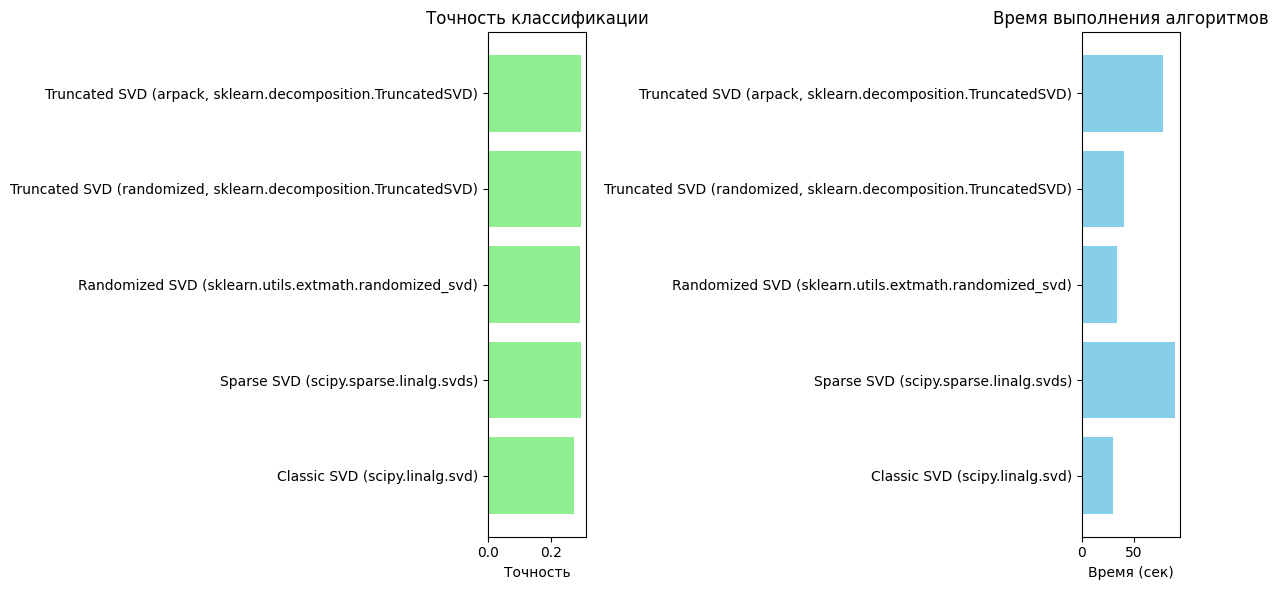

In [18]:
plot_results(best_results)

### Визуализация результатов оптимизации

In [19]:
!pip3 install kaleido --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.8 MB/s eta 0:00:00


In [20]:
from optuna.visualization import plot_pareto_front

for i, study in enumerate(studies):
    print("Алгоритм:", algorithms[i][0])
    fig = plot_pareto_front(study, include_dominated_trials=False, target_names=['accuracy', 'elapsed_time'])
    fig.show()
    # fig.write_image("pareto_front.png", scale=2)

Алгоритм: Classic SVD (scipy.linalg.svd)


Алгоритм: Sparse SVD (scipy.sparse.linalg.svds)


Алгоритм: Randomized SVD (sklearn.utils.extmath.randomized_svd)


Алгоритм: Truncated SVD (randomized, sklearn.decomposition.TruncatedSVD)


Алгоритм: Truncated SVD (arpack, sklearn.decomposition.TruncatedSVD)


# LDA

**1. Найдем формулы для распределения $q(t_d = t)$:**

*будем называть семейство всех дельта функций как $\{ \delta \}$*

$$p(t \, | \, W, \Phi, \pi) = \frac{p(W \, | \, t, \Phi) p(t \, | \, \pi)}{\sum_{t^\prime \in T} p(W \, | \, t^\prime, \Phi) p(t^\prime \, | \, \pi)} =  \frac{p(W \, | \, t, \Phi) p(t \, | \, \pi)}{\texttt{Const}} = \left\{s_1, s_2, \dots, s_T \right\} = \left\{\frac{\hat{s}_1}{\texttt{Const}}, \frac{\hat{s}_2}{\texttt{Const}}, \dots, \frac{\hat{s}_T}{\texttt{Const}} \right\}$$

$$\Rightarrow KL(q(t) \| p(t \, | \, W, \Phi, \pi)) = -1 \cdot \log p(t_i \, | \, W, \Phi, \pi) \rightarrow \min\limits_{q(t) \in \{ \delta \}} \Rightarrow q(t) = \delta\left(t - arg \min_\ell \left\{ \log\hat{s}_1, \log\hat{s}_2, \dots, \log\hat{s}_T \right\} \right)$$

**2. Найдем формулы обновления для $\Phi, \pi$:**

$$\mathbb{E}_{q(t)} \log p(W, t \, | \, \Phi, \pi) = \sum_{d=1}^D \left\{\sum_{n=1}^{N_d} \left\{ \log \Phi_{t_d w_dn} \right\} + \log \pi_{t_d}\right\}$$

Используем ККТ:
- Пусть $\alpha \in \mathbb{Z_+}^{T \times W} = \{ \# w_t \}$ число слов $w$ в каждой теме встретившееся в обучающей выбобрке
- Пусть $\beta \in \mathbb{Z_+}^{T} = \{ \# t \}$ число выборов темы $t$ на e-step

$$\mathcal{L}_\phi = \sum_{t=1}^T \sum_{w=1}^V \alpha_{tw} \log \phi_{tw} - \sum_{t=1}^T \lambda_t \left( \sum_{w=1}^V \phi_{tw} - 1 \right) + C \Rightarrow \nabla_{\phi_{tw}} \mathcal{L} = \frac{\alpha_{tw}}{\phi_{tw}} - \lambda_t = 0 \Rightarrow \phi_{tw} = \frac{\alpha_{tw}}{\lambda_t} \Rightarrow \forall t: \,\, 1 = \sum_{w=1}^V \phi_{tw} = \sum_{w=1}^V \frac{\alpha_{tw}}{\lambda_t} \Rightarrow \lambda_t = \sum_{\ell=1}^V \alpha_{t\ell}$$

$$\mathcal{L}_\pi = \sum_{t=1}^T \beta_t \log \pi_t - \mu \left(\sum_{t=1}^T \pi_t - 1\right) + C \Rightarrow \nabla_{\pi_t} \mathcal{L} = \frac{\beta_t}{\pi_t} - \mu = 0 \Rightarrow \pi_t = \frac{\beta_t}{\mu} \Rightarrow 1 = \sum_{t=1}^T \pi_t = \sum_{t=1}^T \frac{\beta_t}{\mu} \Rightarrow \mu = \sum_{\ell=1}^T \beta_\ell$$

Таким образом получаем:

$$\phi_{tw} = \frac{\alpha_{tw}}{\sum_{\ell}^V \alpha_{t\ell}} \quad\quad \pi_t = \frac{\beta_t}{\sum_{\ell = 1}^T \beta_\ell}$$


**3. Выведем ELBO**

$$\text{\textbf{ELBO}} = A * \log \Phi + B^\intercal \log \pi - \cancel{H(q(t))} \,\,\,\,\,\, \{\text{  вырожденное распределение}\}$$